<a href="https://colab.research.google.com/github/skywalker0803r/ALK-/blob/main/ALK%E7%A1%AB%E9%85%B8%E8%85%90%E8%9D%95%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/MyDrive/ALK硫酸腐蝕預測/AKL單元冷凍系統操作條件(20060912~20091231).xlsx',index_col=0,skiprows=2)
for i in df.columns:
  df[i] = pd.to_numeric(df[i],errors='coerce')
df = df.iloc[1:,:]
df = df.dropna(axis=1,how='all').dropna(axis=0)
df.head()

,入口溫度,出口溫度,入口壓力,出口壓力,出口溫度.1,硫酸濃度
2006/09/12,3.1,58.4,0.3,4.8,32.1,90.94
2006/09/13,3.0,58.3,0.3,4.9,32.4,91.31
2006/09/14,3.0,58.5,0.3,4.9,32.5,91.15
2006/09/15,3.0,58.5,0.3,4.9,32.6,91.62
2006/09/16,3.0,58.8,0.2,4.8,32.0,91.02


In [33]:
abs(df.corr()[['硫酸濃度']].sort_values(by='硫酸濃度'))

,硫酸濃度
出口壓力,0.466870
出口溫度.1,0.301885
入口壓力,0.055460
入口溫度,0.221338
出口溫度,0.262775
硫酸濃度,1.000000


入口溫度


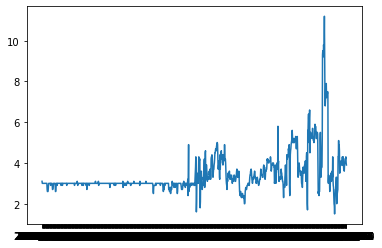

出口溫度


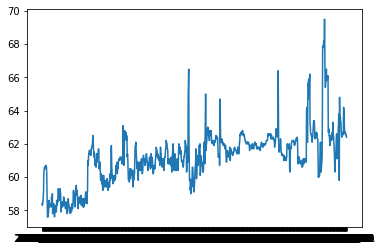

入口壓力


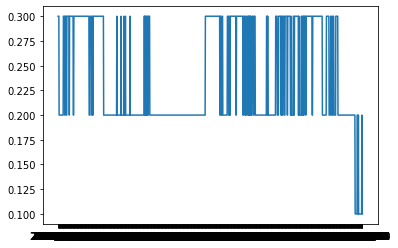

出口壓力


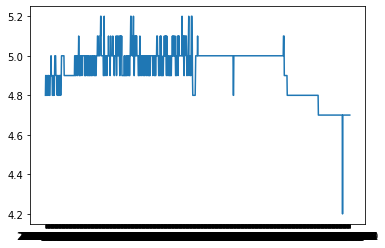

出口溫度.1


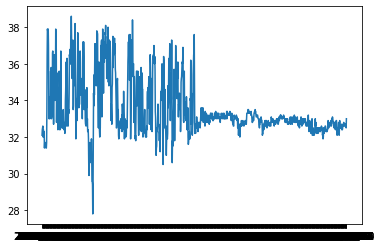

硫酸濃度


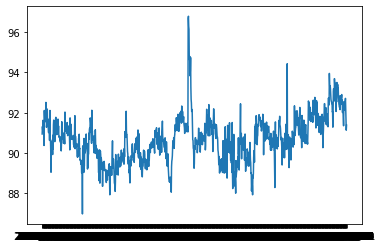

In [34]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
mm = MinMaxScaler()
#df[:] = mm.fit_transform(df)
for i in df.columns:
  print(i)
  plt.plot(df[i])
  plt.show()

入口溫度


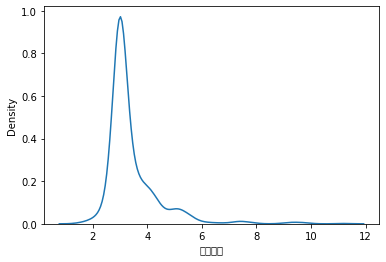

出口溫度


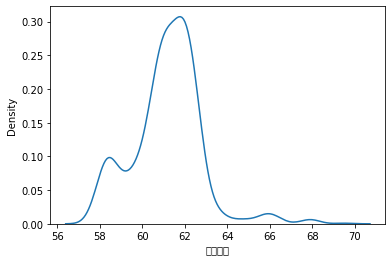

入口壓力


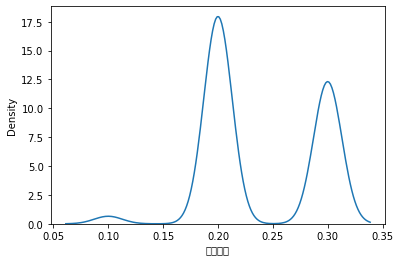

出口壓力


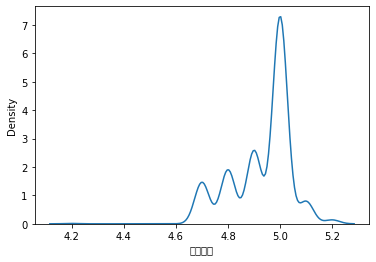

出口溫度.1


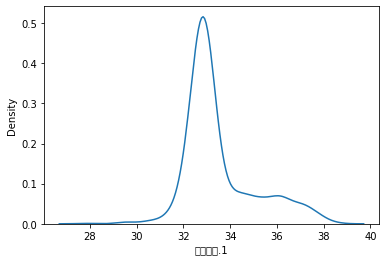

硫酸濃度


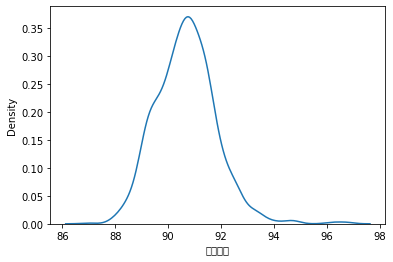

In [39]:
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sb
for i in df.columns:
  print(i)
  sb.kdeplot(df[i])
  plt.show()

[03:55:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5866787343869558


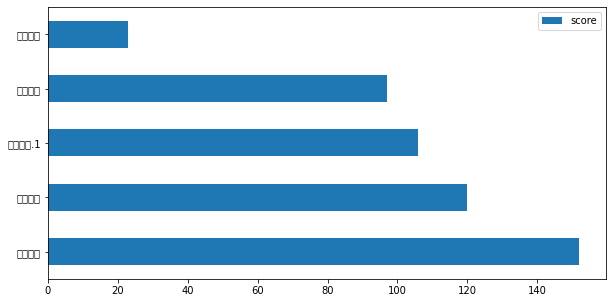

In [47]:
import xgboost
model = xgboost.XGBRegressor()
x = df.drop('硫酸濃度',axis=1)
y = df['硫酸濃度']
model.fit(x,y)
print(model.score(x,y))
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (10,5)) ## plot top 40 features